In [1]:
import pandas as pd
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import numpy as np

In [2]:
data=pd.read_csv('hotel.csv')

In [3]:
data

,address,lat,lon,title,district
0,"No.30 Youya Road, Beitou District, Taipei 1124...",25.137793,121.514950,Grand View Resort Beitou,Beitou
1,"No.28 Section 1, Minsheng East Road, Zhongshan...",25.057854,121.524090,YoMi Hotel,Zhongshan
2,"No.3 Zhongshan Road, Beitou District, Taipei 1...",25.137163,121.505440,Beitou Hot Spring Resort (Tian Yue Quan),Beitou
3,"No.18 Songgao Road, Xinyi District, Taipei 110...",25.039248,121.567410,Humble House Taipei,Xinyi
4,"4F., No.11, Sec. 2, Nanjing E. Road, Taipei 10...",25.052057,121.528310,Taipei Morning Hotel,Zhongshan
5,"No.131 Section 3, Nanjing East Road, Zhongshan...",25.052030,121.540970,FX Hotel - Taipei Nanjing East Road,Zhongshan
6,"2F, No.42, Section 1, Minsheng East Road, Taip...",25.058155,121.524510,Via Hotel Loft,Zhongshan
7,"No.38 Songren Road, Xinyi District, Taipei 110...",25.037867,121.567960,Le Meridien Taipei,Xinyi
8,"No.63 Sung Chiang Road, Taipei 104, Taiwan",25.048920,121.533290,Evergreen Laurel Hotel,Zhongshan
9,"No.600 Linshen North Road, Zhongshan District,...",25.065920,121.525690,Imperial Hotel Taipei,Zhongshan


In [4]:
data['district'].unique()

array(['Beitou', 'Zhongshan', 'Xinyi'], dtype=object)

In [5]:
data_to_model=data.loc[:,['lat','lon']]

In [6]:
data_to_model

,lat,lon
0,25.137793,121.514950
1,25.057854,121.524090
2,25.137163,121.505440
3,25.039248,121.567410
4,25.052057,121.528310
5,25.052030,121.540970
6,25.058155,121.524510
7,25.037867,121.567960
8,25.048920,121.533290
9,25.065920,121.525690


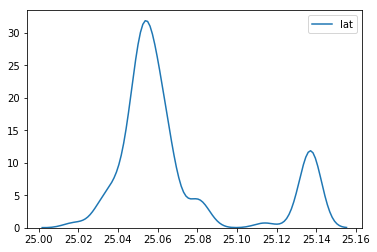

In [8]:
sns.kdeplot(data_to_model['lat'])
plt.show()

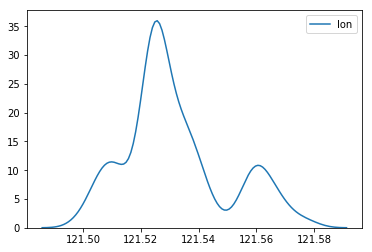

In [9]:
sns.kdeplot(data_to_model['lon'])
plt.show()

In [10]:

scaler = StandardScaler()
data_scaled=scaler.fit_transform(data_to_model)

In [11]:
data_scaled

array([[ 2.1051999 , -0.94983799],
       [-0.3451674 , -0.43100477],
       [ 2.08588854, -1.4896743 ],
       [-0.91549646,  2.02806032],
       [-0.52286264, -0.19145596],
       [-0.52369027,  0.52719049],
       [-0.33594086, -0.40716342],
       [-0.9578282 ,  2.05928114],
       [-0.61902099,  0.09123435],
       [-0.09792059, -0.34018058],
       [ 2.08610311, -1.10594208],
       [-0.38762176,  0.06205708],
       [-0.43449014, -0.32769225],
       [ 2.00913351, -1.39005151],
       [-0.29587744,  0.09634321],
       [ 2.10602753, -1.21606641],
       [-0.02321932, -0.349263  ],
       [-0.51952146,  0.53542143],
       [-0.86516429,  2.3425391 ],
       [-0.38418863, -0.48549929],
       [-0.74865237,  0.32851256],
       [ 2.05115873, -1.4874037 ],
       [ 2.10642602, -1.20244278],
       [-0.50168144, -0.57518818],
       [-0.45410804,  0.23939132],
       [-1.11296285,  1.79475567],
       [-0.59357903, -0.39297214],
       [ 2.0974447 , -1.02022674],
       [-0.6372595 ,

In [12]:
model=KMeans(3)

In [13]:
model.fit(data_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [14]:
data['Clusters']=model.labels_

In [15]:
data[data['Clusters']==0]

,address,lat,lon,title,district,Clusters
0,"No.30 Youya Road, Beitou District, Taipei 1124...",25.137793,121.514950,Grand View Resort Beitou,Beitou,0
2,"No.3 Zhongshan Road, Beitou District, Taipei 1...",25.137163,121.505440,Beitou Hot Spring Resort (Tian Yue Quan),Beitou,0
10,"No.11 Youya Road, Beitou District, Taipei 112,...",25.137170,121.512200,Hotel DOUBLE ONE,Beitou,0
13,"No.1 Qiyan Road, Beitou District, Taipei 11242...",25.134659,121.507195,The Gaia Hotel,Beitou,0
15,"No.26 Zhongshan Road, Beitou District, Taipei ...",25.137820,121.510260,Royal Seasons Hotel (Hot Spring Beitou),Beitou,0
21,"No.224 Cuang Ming Road, Beitou District, Taipe...",25.136030,121.505480,Sweetme Hotspring Resort,Beitou,0
22,"No.32 Zhongshan Road, Beitou District, Taipei ...",25.137833,121.510500,Villa 32,Beitou,0
27,"No.18 You Ya Road, Beitou District, Taipei 112...",25.137540,121.513710,Spring City Resort,Beitou,0
29,"No.240 Guangming Road, Beitou District, Taipei...",25.136260,121.507330,Golden Hot Spring Hotel,Beitou,0
34,"No.1 Yinguang Lane, Wenquan Road, Peitou Distr...",25.136600,121.513030,Nine Plus Spa Hot Spring Hotel,Beitou,0


In [16]:
data[data['Clusters']==1]

,address,lat,lon,title,district,Clusters
1,"No.28 Section 1, Minsheng East Road, Zhongshan...",25.057854,121.524090,YoMi Hotel,Zhongshan,1
4,"4F., No.11, Sec. 2, Nanjing E. Road, Taipei 10...",25.052057,121.528310,Taipei Morning Hotel,Zhongshan,1
5,"No.131 Section 3, Nanjing East Road, Zhongshan...",25.052030,121.540970,FX Hotel - Taipei Nanjing East Road,Zhongshan,1
6,"2F, No.42, Section 1, Minsheng East Road, Taip...",25.058155,121.524510,Via Hotel Loft,Zhongshan,1
8,"No.63 Sung Chiang Road, Taipei 104, Taiwan",25.048920,121.533290,Evergreen Laurel Hotel,Zhongshan,1
9,"No.600 Linshen North Road, Zhongshan District,...",25.065920,121.525690,Imperial Hotel Taipei,Zhongshan,1
11,"No.186 Sung Chiang Road, Taipei 10467, Taiwan",25.056469,121.532776,Taipei Gala Hotel,Zhongshan,1
12,"No.39 Changchun Road, Zhongshan District, Taip...",25.054940,121.525910,Tokyo International Hotel,Zhongshan,1
14,"No.253 Songjiang Road, Taipei 104, Taiwan",25.059462,121.533380,Check Inn Taipei,Zhongshan,1
16,"No.646 Linsen North Road, Taipei 104, Taiwan",25.068357,121.525530,Riviera Hotel,Zhongshan,1


In [17]:
data[data['Clusters']==2]

,address,lat,lon,title,district,Clusters
3,"No.18 Songgao Road, Xinyi District, Taipei 110...",25.039248,121.567410,Humble House Taipei,Xinyi,2
7,"No.38 Songren Road, Xinyi District, Taipei 110...",25.037867,121.567960,Le Meridien Taipei,Xinyi,2
18,"No.297 Section 5, Zhongxiao East Road, Xinyi D...",25.040890,121.572950,THE Tango Taipei XinYi,Xinyi,2
25,"B1, No.16, Sec. 5, Xinyi Road, Xinyi District,...",25.032806,121.563300,Sparkle Hotel,Xinyi,2
41,"No.299 Zhifu Road, Zhongshan District, Taipei ...",25.080900,121.561580,Mulan Motel Taipei,Zhongshan,2
42,"No.168 Jingye Fourth Road, Taipei 104, Taiwan",25.084333,121.558500,Grand Victoria Hotel,Zhongshan,2
54,"No.98 Yanchang Road, Xinyi District, Taipei 11...",25.044977,121.561500,Eslite Hotel,Xinyi,2
55,"No. 199, Lequn 2nd Road, Taipei, Taiwan, Taipe...",25.080334,121.558960,Taipei Marriott Hotel,Zhongshan,2
61,"No.55-1 Section 4, Nanking East Road, Songshan...",25.051850,121.552390,Capital Hotel Arena,Zhongshan,2
66,"No. 199, Lequn 2nd Road, Taipei, Taiwan, Taipe...",25.080334,121.558960,Taipei Marriott Hotel,Zhongshan,2


In [ ]:
#As seen above...
#Cluster 0 and 2  hotels are located in same district but
#Cluster 2 hotels are located in two different districts names 'Xinyi' and 'Zhongshan'